In [1]:
import xarray as xr 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from os.path import join
from bridgescaler import load_scaler
%matplotlib inline

In [9]:
ls /glade/derecho/scratch/jsauer/SEALS_TRAINING/TEST_TRANSFORMER/

2024-05-24_1413/  2024-06-06_2345/  2024-06-12_1310/  2024-06-13_2126/
2024-05-24_1813/  2024-06-07_0741/  2024-06-12_1351/  2024-06-13_2218/
2024-05-24_2044/  2024-06-07_0757/  2024-06-12_1425/  2024-06-13_2325/
2024-05-24_2327/  2024-06-07_0845/  2024-06-12_1439/  2024-06-14_1010/
2024-05-25_2034/  2024-06-07_0850/  2024-06-12_1450/  2024-06-14_1013/
2024-05-25_2046/  2024-06-07_0909/  2024-06-12_1647/  2024-06-14_1019/
2024-05-25_2051/  2024-06-07_1304/  2024-06-12_1651/  2024-06-14_1037/
2024-05-25_2100/  2024-06-07_1309/  2024-06-12_1655/  2024-06-14_1456/
2024-05-25_2128/  2024-06-07_1327/  2024-06-12_1657/  2024-06-14_1539/
2024-05-26_0009/  2024-06-08_1302/  2024-06-12_1755/  2024-06-14_1613/
2024-05-29_0846/  2024-06-08_1303/  2024-06-12_1757/  2024-06-14_1642/
2024-06-03_1349/  2024-06-08_1321/  2024-06-12_1759/  2024-06-14_1700/
2024-06-03_2345/  2024-06-08_1325/  2024-06-12_1801/  2024-06-14_1755/
2024-06-04_1021/  2024-06-08_1326/  2024-06-13_1344/  2024-06-14_1819/
2024-0

In [8]:
model_path = "/glade/derecho/scratch/jsauer/SEALS_TRAINING/TEST_TRANSFORMER/2024-06-12_0915/"
val_loc_output = xr.open_dataset(join(model_path, "transformer_leak_loc_output_2024-06-12_0915_val.nc"))

In [32]:
val_loc_output

<xarray.Dataset> Size: 7MB
Dimensions:        (sample: 16128, pot_leak_locs: 38)
Dimensions without coordinates: sample, pot_leak_locs
Data variables:
    targets        (sample, pot_leak_locs) int64 5MB ...
    leak_loc_pred  (sample, pot_leak_locs) float32 2MB 0.02076 ... 0.0005767

In [4]:
val_files = pd.read_csv(join(model_path, "validation_files.csv"))

In [5]:
f_indices = val_files["validation_files"].str.split("/").str[-1].str[17:-3].str.replace("RefOri_","").str.replace("srcDim", "SD_")

In [14]:
f_indices

0    CBL_02_SD_3
1    CBL_04_SD_7
2    CBL_02_SD_0
3    CBL_02_SD_8
4    CBL_03_SD_0
5    CBL_03_SD_7
6    CBL_00_SD_3
7    CBL_00_SD_0
8    CBL_03_SD_3
Name: validation_files, dtype: object

In [6]:
all_val_data = []
for val_file in val_files["validation_files"]:
    val_file_ds = xr.open_dataset(val_file)
    all_val_data.append(val_file_ds["target"][:, :, 0])
    val_file_ds.close()
val_data = xr.concat(all_val_data, "sample")

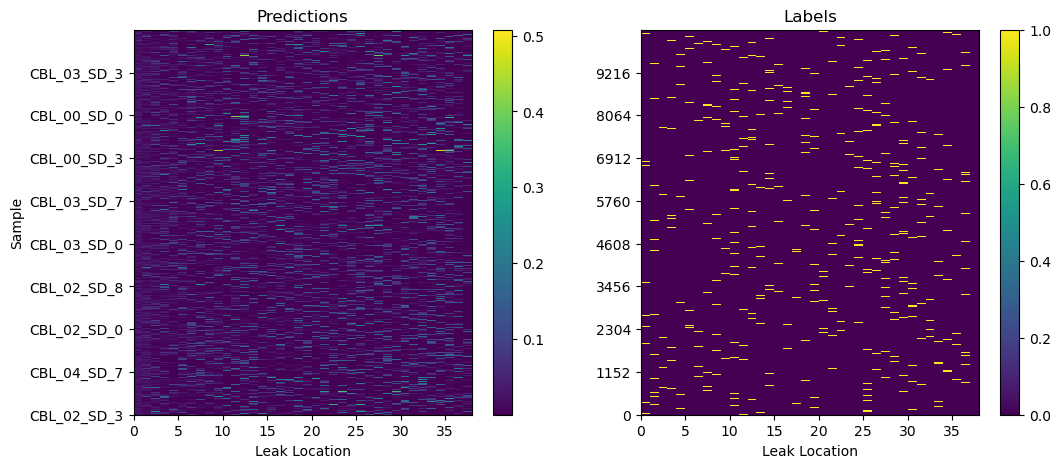

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pcolormesh(val_loc_output["leak_loc_pred"])
plt.yticks(np.arange(0, val_loc_output["leak_loc_pred"].shape[0], 1152), f_indices)
plt.xlabel("Leak Location")
plt.ylabel("Sample")
plt.colorbar()
plt.title("Predictions")
plt.subplot(1, 2, 2)
plt.pcolormesh(val_data)
plt.yticks(np.arange(0, val_loc_output["leak_loc_pred"].shape[0], 1152))
plt.xlabel("Leak Location")
plt.title("Labels")
plt.colorbar()
plt.savefig("pred_true_stars.png", dpi=300, bbox_inches="tight")

In [7]:
vds = xr.open_dataset(val_files["validation_files"][0])

In [8]:
vds2 = xr.open_dataset(val_files["validation_files"][1])

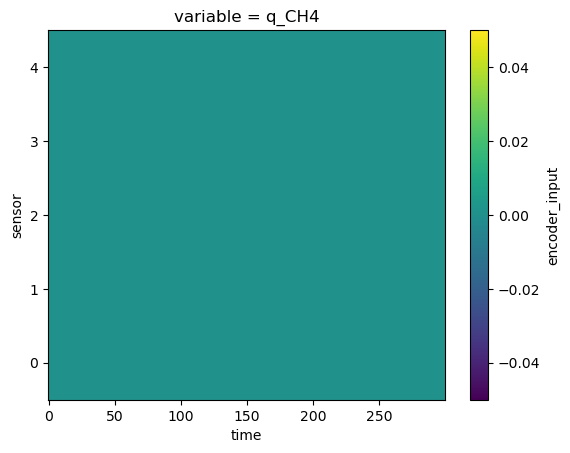

In [12]:
vds["encoder_input"][25, :, :, -1, 0].plot()

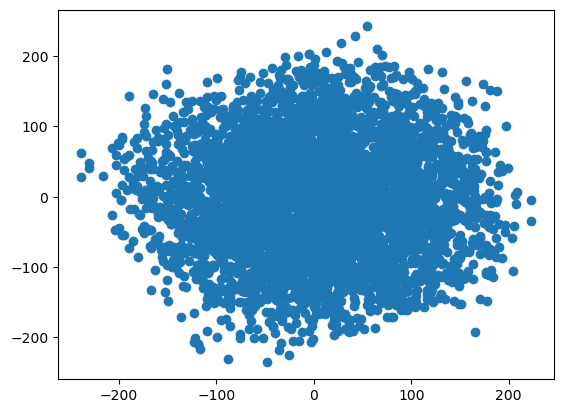

In [39]:
plt.scatter(vds["encoder_input"][:, 1:, -1, 0, 0] * vds["encoder_input"][:, 1:, -1, 1, 0], 
            vds["encoder_input"][:, 1:, -1, 0, 0] * vds["encoder_input"][:, 1:, -1, 2, 0])

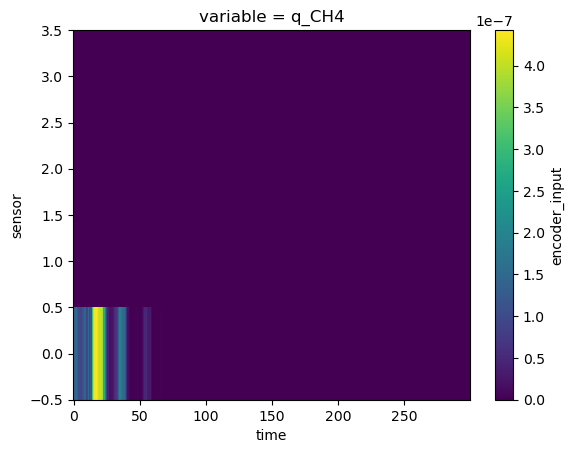

In [20]:
vds["encoder_input"][225, 1:, :, -1, 0].plot()

In [29]:
np.count_nonzero(vds2["encoder_input"][:, 1:, :, -1, 0].max(axis=-1).max(axis=-1) == 0)

366

In [28]:
np.count_nonzero(vds2["encoder_input"][:, 1:, :, -1, 0].max(axis=-1).max(axis=-1) > 0)

786

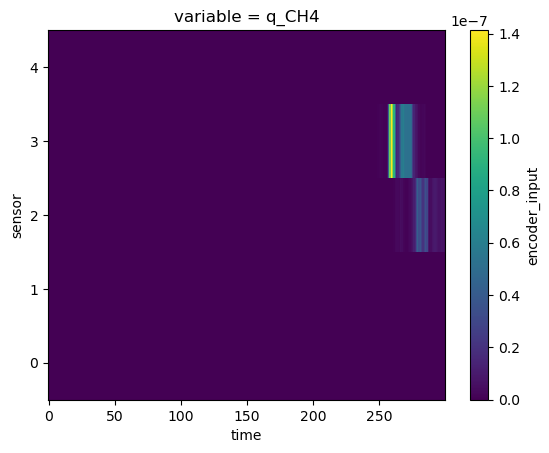

In [11]:
vds2["encoder_input"][25, :, :, -1, 0].plot()

In [35]:
val_data["target"][:, :, 0]

(1152, 38)

In [60]:
val_data["target"][:, :, 0]

<xarray.DataArray 'target' (sample: 1152, pot_leak: 38)> Size: 350kB
[43776 values with dtype=int64]
Dimensions without coordinates: sample, pot_leak

In [68]:
val_data.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [54]:
leak_index = np.argmax(val_data.values, axis=1)
pred_leak_loc_order = np.argsort(val_loc_output["leak_loc_pred"].values, axis=1)[:, ::-1]
pred_search_length = np.zeros(leak_index.shape, dtype=int)
for i in range(leak_index.size):
    pred_search_length[i] = np.where(pred_leak_loc_order[i] == leak_index[i])[0][0]    

(array([0.38588686, 0.44217936, 0.50254087, 0.56262659, 0.61409505,
        0.66216815, 0.70500127, 0.74389648, 0.77901657, 0.81089048,
        0.8392334 , 0.86429398, 0.88813838, 0.90871853, 0.92675781,
        0.94322374, 0.956656  , 0.96800401, 0.97705982, 0.9834979 ,
        0.98864294, 0.99237287, 0.99486853, 0.99671766, 0.99789316,
        0.9986301 , 0.99906865, 0.99942582, 0.999679  , 0.9998282 ,
        0.99991862, 0.99995479, 0.99998192, 0.99998644, 0.99999096,
        0.99999548, 1.        , 1.        ]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.]),
 <BarContainer object of 38 artists>)

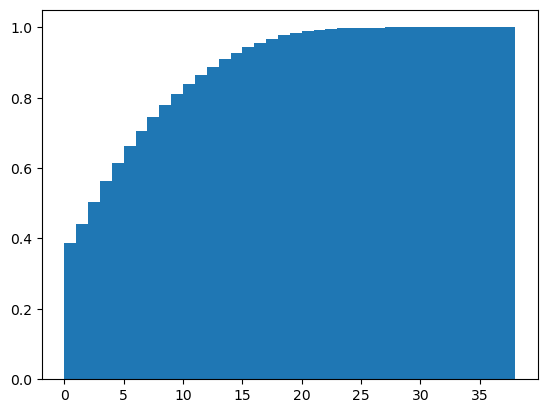

In [61]:
plt.hist(pred_search_length, np.arange(0, 39), cumulative=True, density=True)

In [59]:
np.count_nonzero(pred_search_length < 10) / pred_search_length.size

0.8108904803240741

In [73]:
acc_by_file = np.zeros(f_indices.size)
for i in range(f_indices.size):
    leak_index = np.argmax(val_data.values[1152 * i:1152 * (i + 1)], axis=1)
    pred_leak_loc_order = np.argsort(val_loc_output["leak_loc_pred"].values[1152 * i: 1152 * (i + 1)], axis=1)[:, ::-1]
    pred_search_length = np.zeros(leak_index.shape, dtype=int)
    for j in range(leak_index.size):
        pred_search_length[j] = np.where(pred_leak_loc_order[j] == leak_index[j])[0][0] 
    acc_by_file[i] = np.count_nonzero(pred_search_length == 0) / pred_search_length.size

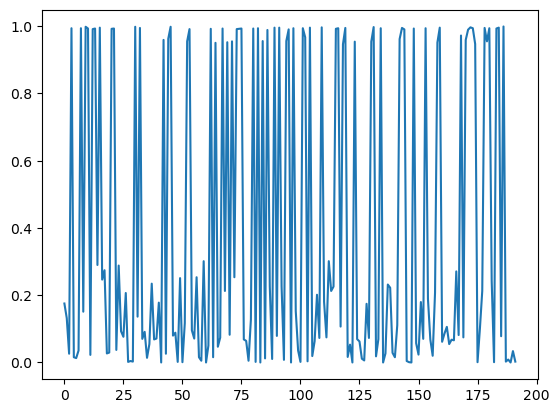

In [75]:
plt.plot(acc_by_file)

In [76]:
acc_by_file

array([1.75347222e-01, 1.31944444e-01, 2.60416667e-02, 9.93923611e-01,
       1.56250000e-02, 1.30208333e-02, 3.55902778e-02, 9.93923611e-01,
       1.51041667e-01, 9.98263889e-01, 9.93055556e-01, 2.25694444e-02,
       9.91319444e-01, 9.93055556e-01, 2.89930556e-01, 9.95659722e-01,
       2.46527778e-01, 2.74305556e-01, 2.69097222e-02, 2.95138889e-02,
       9.92187500e-01, 9.93055556e-01, 3.73263889e-02, 2.88194444e-01,
       9.28819444e-02, 7.63888889e-02, 2.06597222e-01, 1.73611111e-03,
       4.34027778e-03, 2.60416667e-03, 9.98263889e-01, 1.36284722e-01,
       9.94791667e-01, 7.03125000e-02, 9.11458333e-02, 1.38888889e-02,
       5.46875000e-02, 2.34375000e-01, 6.85763889e-02, 7.11805556e-02,
       1.77951389e-01, 0.00000000e+00, 9.59201389e-01, 2.60416667e-02,
       9.62673611e-01, 9.98263889e-01, 7.98611111e-02, 8.85416667e-02,
       1.73611111e-03, 2.50868056e-01, 8.68055556e-04, 1.17187500e-01,
       9.54861111e-01, 9.91319444e-01, 9.54861111e-02, 7.11805556e-02,
      

In [81]:
pd.DataFrame({"srcdim": f_indices.str[-1].astype(int), "acc":acc_by_file}).groupby("srcdim").min()

,acc
srcdim,
0,0.000000
1,0.989583
2,0.946181
3,0.054688
4,0.988715
5,0.000868
6,0.050347
7,0.206597
8,0.013889


In [19]:
scaler = load_scaler(join(model_path, "scaler_2024-06-12_0915.json"))

(0.8, 1)

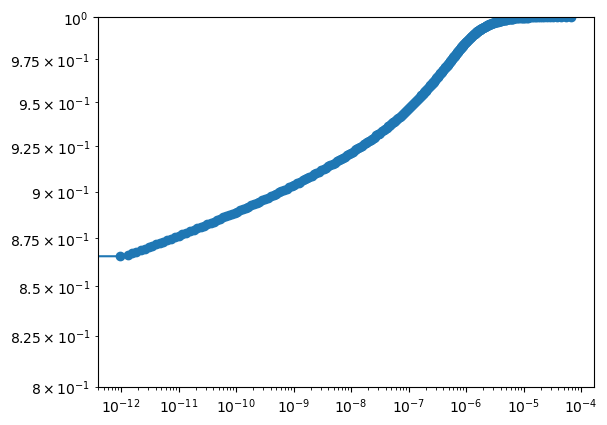

In [42]:
plt.plot(scaler.centroids_[-1][:, 0], np.cumsum(scaler.centroids_[-1][:,1]) / scaler.centroids_[-1][:, 1].sum(), marker='o')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.ylim(8e-1, 1)

In [30]:
scaler.centroids_[-1]

array([[0.00000000e+00, 2.90000000e+01],
       [0.00000000e+00, 7.70000000e+01],
       [0.00000000e+00, 1.66000000e+02],
       ...,
       [4.56165070e-05, 1.44000000e+02],
       [5.39199162e-05, 9.80000000e+01],
       [6.78148304e-05, 5.60000000e+01]])